In [10]:
import pandas as pd #ÌåêÎã§Ïä§
import numpy as np #ÎÑòÌååÏù¥
import seaborn as sns #Ïî®Î≥∏
import re #Ï†ïÍ∑úÏãù
import matplotlib
import matplotlib.pyplot as plt #ÏãúÍ∞ÅÌôî
%matplotlib inline

#ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÍ¥ÄÎ†®
from collections import Counter
from collections import OrderedDict
from konlpy.tag import Okt
from wordcloud import WordCloud
okt = Okt()

In [11]:
# Ï∞∏Í≥† : https://blog.naver.com/sisomimoctrl/222793631920

# ÌïúÍµ≠Ïñ¥ Ìè∞Ìä∏Î•º ÏúÑÌïú ÏÑ§Ï†ï !
# ÌïúÍ∏ÄÌè∞Ìä∏ ÌååÏùºÏùÑ ÏóÖÎ°úÎìú Ï£ºÌîºÌÑ∞ÎÖ∏Ìä∏Î∂ÅÏóê ÎØ∏Î¶¨ ÏóÖÎ°úÎìú Ìï¥ÎÜìÍ≥† Î∂àÎü¨Ïò§Í∏∞ 

from matplotlib import font_manager

# ÎßëÏùÄÍ≥†Îîï
font_fname = 'fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname = font_fname).get_name()
plt.rcParams['font.family'] = font_family

# Ï†ÑÏ≤òÎ¶¨

In [12]:
# Í≥†Ï∂©ÎØºÏõê : Grievance

Grievance = pd.read_excel('8_Ïó∞ÏàòÍµ¨_Í≥†Ï∂©ÎØºÏõê_Í≤©ÏûêÎß§Ìïë.xlsx')
Grievance.head()

apply_date                                     compl_contents       gid
0      202206                                    ÏàòÍ∏âÏûê Ï∑®ÏßÅÏóê ÎåÄÌïú Í≥†Î∞ú Í±¥  Îã§ÏÇ¨241365
1      202206                  Ïò•Î†®Îèô246 ÎèÑÏãúÍ¥ÄÎ¶¨Î∞©Ïïà ÏàòÎ¶ΩÏö©Ïó≠ ÎèÑÏãúÍ¥ÄÎ¶¨Î∞©Ïïà Í≤ÄÌÜ† Î∞è Ï†úÏïà  Îã§ÏÇ¨248368
2      202206                      ÏÜ°ÎèÑÍ≥†Îì±ÌïôÍµê Ï†ïÎ¨∏Ïïû Ïó≠Ï£ºÌñâÎ∞©ÏßÄÎ•º ÏúÑÌïú ÏÑ§ÏπòÎ¨º ÏÑ§ÏπòÏöîÏ≤≠  Îã§ÏÇ¨242367
3      202206  Ïò•Î†®Îèô 348-203,153,182Î≤àÏßÄ Îã®ÎèÖÏ£ºÌÉùÎ∂ÄÏßÄ Í∞úÎ∞úÌóàÍ∞Ä Ï∑®ÏÜå ÌõÑ Ï≤≠ÎüâÏÇ∞ ÏûêÏó∞Í≥µ...  Îã§ÏÇ¨253364
4      202206       Ïò•Î†®Îèô ÎÇ¥ ÏãúÍ∞ÅÏû•Ïï†Ïù∏Î≥¥ÎèÑ Î≥¥ÏàòÏ°∞Ïπò ÏöîÏ≤≠(Ïö∞Î¶¨ÏùÄÌñâÏÇ¨Í±∞Î¶¨,Ïù∏ÏÜ°Ï§ëÏÇ¨Í±∞Î¶¨,Ïò•Î†®ÌÑ∞ÎÑêÏÇ¨Í±∞Î¶¨  Îã§ÏÇ¨242367

In [13]:
# nullÍ∞í Ï†úÍ±∞
Grievance = Grievance.dropna()
Grievance.reset_index(inplace = True)
Grievance.drop('index', axis = 1, inplace = True)

In [14]:
Grievance.head()

apply_date                                     compl_contents       gid
0      202206                                    ÏàòÍ∏âÏûê Ï∑®ÏßÅÏóê ÎåÄÌïú Í≥†Î∞ú Í±¥  Îã§ÏÇ¨241365
1      202206                  Ïò•Î†®Îèô246 ÎèÑÏãúÍ¥ÄÎ¶¨Î∞©Ïïà ÏàòÎ¶ΩÏö©Ïó≠ ÎèÑÏãúÍ¥ÄÎ¶¨Î∞©Ïïà Í≤ÄÌÜ† Î∞è Ï†úÏïà  Îã§ÏÇ¨248368
2      202206                      ÏÜ°ÎèÑÍ≥†Îì±ÌïôÍµê Ï†ïÎ¨∏Ïïû Ïó≠Ï£ºÌñâÎ∞©ÏßÄÎ•º ÏúÑÌïú ÏÑ§ÏπòÎ¨º ÏÑ§ÏπòÏöîÏ≤≠  Îã§ÏÇ¨242367
3      202206  Ïò•Î†®Îèô 348-203,153,182Î≤àÏßÄ Îã®ÎèÖÏ£ºÌÉùÎ∂ÄÏßÄ Í∞úÎ∞úÌóàÍ∞Ä Ï∑®ÏÜå ÌõÑ Ï≤≠ÎüâÏÇ∞ ÏûêÏó∞Í≥µ...  Îã§ÏÇ¨253364
4      202206       Ïò•Î†®Îèô ÎÇ¥ ÏãúÍ∞ÅÏû•Ïï†Ïù∏Î≥¥ÎèÑ Î≥¥ÏàòÏ°∞Ïπò ÏöîÏ≤≠(Ïö∞Î¶¨ÏùÄÌñâÏÇ¨Í±∞Î¶¨,Ïù∏ÏÜ°Ï§ëÏÇ¨Í±∞Î¶¨,Ïò•Î†®ÌÑ∞ÎÑêÏÇ¨Í±∞Î¶¨  Îã§ÏÇ¨242367

In [15]:
# Î≥µÏÇ¨ : ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌõºÏÜê Î∞©ÏßÄ

Grievance2 = Grievance.copy()
Grievance2.head()

apply_date                                     compl_contents       gid
0      202206                                    ÏàòÍ∏âÏûê Ï∑®ÏßÅÏóê ÎåÄÌïú Í≥†Î∞ú Í±¥  Îã§ÏÇ¨241365
1      202206                  Ïò•Î†®Îèô246 ÎèÑÏãúÍ¥ÄÎ¶¨Î∞©Ïïà ÏàòÎ¶ΩÏö©Ïó≠ ÎèÑÏãúÍ¥ÄÎ¶¨Î∞©Ïïà Í≤ÄÌÜ† Î∞è Ï†úÏïà  Îã§ÏÇ¨248368
2      202206                      ÏÜ°ÎèÑÍ≥†Îì±ÌïôÍµê Ï†ïÎ¨∏Ïïû Ïó≠Ï£ºÌñâÎ∞©ÏßÄÎ•º ÏúÑÌïú ÏÑ§ÏπòÎ¨º ÏÑ§ÏπòÏöîÏ≤≠  Îã§ÏÇ¨242367
3      202206  Ïò•Î†®Îèô 348-203,153,182Î≤àÏßÄ Îã®ÎèÖÏ£ºÌÉùÎ∂ÄÏßÄ Í∞úÎ∞úÌóàÍ∞Ä Ï∑®ÏÜå ÌõÑ Ï≤≠ÎüâÏÇ∞ ÏûêÏó∞Í≥µ...  Îã§ÏÇ¨253364
4      202206       Ïò•Î†®Îèô ÎÇ¥ ÏãúÍ∞ÅÏû•Ïï†Ïù∏Î≥¥ÎèÑ Î≥¥ÏàòÏ°∞Ïπò ÏöîÏ≤≠(Ïö∞Î¶¨ÏùÄÌñâÏÇ¨Í±∞Î¶¨,Ïù∏ÏÜ°Ï§ëÏÇ¨Í±∞Î¶¨,Ïò•Î†®ÌÑ∞ÎÑêÏÇ¨Í±∞Î¶¨  Îã§ÏÇ¨242367

In [16]:
# ÎØºÏõêÎÇ¥Ïö©
# Î¨∏ÏûêÏó¥ Î©îÏÜåÎìúÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï®
Grievance2['compl_contents'] = Grievance2['compl_contents'].astype('str')

In [17]:
# ÎØºÏõêÎÇ¥Ïö© ÎåÄÎûµÏ†Å ÌôïÏù∏
Grievance2['compl_contents']

0                                         ÏàòÍ∏âÏûê Ï∑®ÏßÅÏóê ÎåÄÌïú Í≥†Î∞ú Í±¥
1                       Ïò•Î†®Îèô246 ÎèÑÏãúÍ¥ÄÎ¶¨Î∞©Ïïà ÏàòÎ¶ΩÏö©Ïó≠ ÎèÑÏãúÍ¥ÄÎ¶¨Î∞©Ïïà Í≤ÄÌÜ† Î∞è Ï†úÏïà
2                           ÏÜ°ÎèÑÍ≥†Îì±ÌïôÍµê Ï†ïÎ¨∏Ïïû Ïó≠Ï£ºÌñâÎ∞©ÏßÄÎ•º ÏúÑÌïú ÏÑ§ÏπòÎ¨º ÏÑ§ÏπòÏöîÏ≤≠
3       Ïò•Î†®Îèô 348-203,153,182Î≤àÏßÄ Îã®ÎèÖÏ£ºÌÉùÎ∂ÄÏßÄ Í∞úÎ∞úÌóàÍ∞Ä Ï∑®ÏÜå ÌõÑ Ï≤≠ÎüâÏÇ∞ ÏûêÏó∞Í≥µ...
4            Ïò•Î†®Îèô ÎÇ¥ ÏãúÍ∞ÅÏû•Ïï†Ïù∏Î≥¥ÎèÑ Î≥¥ÏàòÏ°∞Ïπò ÏöîÏ≤≠(Ïö∞Î¶¨ÏùÄÌñâÏÇ¨Í±∞Î¶¨,Ïù∏ÏÜ°Ï§ëÏÇ¨Í±∞Î¶¨,Ïò•Î†®ÌÑ∞ÎÑêÏÇ¨Í±∞Î¶¨
                              ...                        
1508                                Í∏àÏó∞ÎπåÎî© Ïïû Ìù°Ïó∞ Î™©Í≤©, ÏãúÏ†ïÏ°∞Ïπò Î∂ÄÌÉÅ
1509                              Ïª§ÎÆ§ÎãàÌã∞ÏÑºÌÑ∞ Î∞è Ï°∞Í≤Ω ÏóÖÍ∑∏Î†àÏù¥ÎìúÏóê Í¥ÄÌïú Í±¥
1510                ÏÜ°ÎèÑÏù¥Ìé∏ÌïúÏÑ∏ÏÉÅÏïÑÌååÌä∏ Í≥µÎèôÏ£ºÌÉù ÏûÖÏ£ºÏûêÎåÄÌëúÌöåÏùò Ïö¥ÏòÅÎπÑ Ï†úÏ†ïÎ¨¥Ìö® ÎØºÏõêÏ†úÍ∏∞
1511    1. Ïù∏Ï≤úÌëúÏ§ÄÍ¥ÄÎ¶¨Í∑úÏïΩ Î∂ÄÏπô Ï†ú3Ï°∞Ïóê ÏùòÌïòÎ©¥ ÌëúÏ§ÄÍ¥ÄÎ¶¨Í∑úÏïΩÏù¥ Í∞úÏ†ïÎêòÎ©¥ 60Ïùº Ïù¥

In [18]:
# Í≥†Ï∂©ÎØºÏõê Ï†ÑÏ≤¥ data Ìï©Ïπ® : Grievance_text
# join Ïù¥Ïö© : ' ' ÎùÑÏñ¥Ïì∞Í∏∞Î°ú !

Grievance_text = ' '.join(Grievance2['compl_contents'])
Grievance_text

"ÏàòÍ∏âÏûê Ï∑®ÏßÅÏóê ÎåÄÌïú Í≥†Î∞ú Í±¥ Ïò•Î†®Îèô246 ÎèÑÏãúÍ¥ÄÎ¶¨Î∞©Ïïà ÏàòÎ¶ΩÏö©Ïó≠ ÎèÑÏãúÍ¥ÄÎ¶¨Î∞©Ïïà Í≤ÄÌÜ† Î∞è Ï†úÏïà ÏÜ°ÎèÑÍ≥†Îì±ÌïôÍµê Ï†ïÎ¨∏Ïïû Ïó≠Ï£ºÌñâÎ∞©ÏßÄÎ•º ÏúÑÌïú ÏÑ§ÏπòÎ¨º ÏÑ§ÏπòÏöîÏ≤≠ Ïò•Î†®Îèô 348-203,153,182Î≤àÏßÄ Îã®ÎèÖÏ£ºÌÉùÎ∂ÄÏßÄ Í∞úÎ∞úÌóàÍ∞Ä Ï∑®ÏÜå ÌõÑ Ï≤≠ÎüâÏÇ∞ ÏûêÏó∞Í≥µÏõê Ï°∞ÏÑ± ÏöîÏ≤≠ Ïò•Î†®Îèô ÎÇ¥ ÏãúÍ∞ÅÏû•Ïï†Ïù∏Î≥¥ÎèÑ Î≥¥ÏàòÏ°∞Ïπò ÏöîÏ≤≠(Ïö∞Î¶¨ÏùÄÌñâÏÇ¨Í±∞Î¶¨,Ïù∏ÏÜ°Ï§ëÏÇ¨Í±∞Î¶¨,Ïò•Î†®ÌÑ∞ÎÑêÏÇ¨Í±∞Î¶¨ ÏÜ°ÎèÑÍ≥†Îì±ÌïôÍµê Ï†ïÎ¨∏Ïïû Ìö°Îã®Î≥¥ÎèÑ Ï£ºÏ∞® Î∞è Ïó≠Ï£ºÌñâÎ∞©ÏßÄÎ•º ÏúÑÌïú ÏÑ§ÏπòÎ¨º ÏÑ§ÏπòÏöîÏ≤≠ Ïò•Î†®ÌòÑÎåÄ3Ï∞®ÏïÑÌååÌä∏ ÏûÖÏ£ºÏûêÎåÄÌëúÌöåÏùò ÎèôÎåÄÌëúÍ∞êÏÇ¨ Ìô©ÏÉâÏã§ÏÑ†ÏÑ§ÏπòÎèôÏùòÏÑúÎ™ÖÏÑú Í≥µÏÇ¨Ïû•ÌèêÍ∏∞Î¨º Ïã†Í≥† Î∞è Ï≤òÎ¶¨ÏöîÏ≤≠ ÎèÑÎ°ú Í≥µÏÇ¨ ÏöîÏ≤≠ Ïò•Î†®4Ï∞® ÌòÑÎåÄÏïÑÌååÌä∏ ÏûÖÏ£ºÏûêÎåÄÌëúÌöåÏû•,Í¥ÄÎ¶¨ÏÜåÏû•Ïóê ÎåÄÌïú Ï≤òÎ∂ÑÏöîÏ≤≠ Ïò•Î†®Îèô ÌòÑÎåÄÏïÑÌååÌä∏ ÏÑ†Í±∞Í¥ÄÎ¶¨ Í¥ÄÎ†® Ïò•Î†®4Ï≤òÌòÑÎåÄÏïÑÌååÌä∏ ÏÑ†Í±∞Í¥ÄÎ¶¨ Í¥ÄÎ†® Ïò•Î†®Îèô348-153Î≤àÏßÄ Íµ¨Ï≤≠ÌöåÏã†Ïóê ÎåÄÌïú Ï†ïÌôïÌïú ÎãµÎ≥Ä Î∞è Í≥µÏÇ¨Î∞©Ìï¥Ïóê ÎåÄÌïú Ìï¥Í≤∞Ï±ÖÏ†ïÎ¶¨ Î∞è ÌôïÏ†ïÏöîÏ≤≠Ïùò Í±¥

In [38]:
# ÎØºÏõê Îç∞Ïù¥ÌÑ∞ ÌÖçÏä§Ìä∏ ÌååÏùºÎ°ú Ï†ÄÏû• : 'Í≥†Ï∂©ÎØºÏõê_text_data.txt'

with open('Í≥†Ï∂©ÎØºÏõê_text.txt', 'w', encoding='utf8') as f:
    f.write(Grievance_text)

In [39]:
# ÎØºÏõê ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ : Grievance_text2

f = open('Í≥†Ï∂©ÎØºÏõê_text.txt', 'r', encoding='utf8')

Grievance_text2 = f.read()
Grievance_text2

"ÏàòÍ∏âÏûê Ï∑®ÏßÅÏóê ÎåÄÌïú Í≥†Î∞ú Í±¥ Ïò•Î†®Îèô246 ÎèÑÏãúÍ¥ÄÎ¶¨Î∞©Ïïà ÏàòÎ¶ΩÏö©Ïó≠ ÎèÑÏãúÍ¥ÄÎ¶¨Î∞©Ïïà Í≤ÄÌÜ† Î∞è Ï†úÏïà ÏÜ°ÎèÑÍ≥†Îì±ÌïôÍµê Ï†ïÎ¨∏Ïïû Ïó≠Ï£ºÌñâÎ∞©ÏßÄÎ•º ÏúÑÌïú ÏÑ§ÏπòÎ¨º ÏÑ§ÏπòÏöîÏ≤≠ Ïò•Î†®Îèô 348-203,153,182Î≤àÏßÄ Îã®ÎèÖÏ£ºÌÉùÎ∂ÄÏßÄ Í∞úÎ∞úÌóàÍ∞Ä Ï∑®ÏÜå ÌõÑ Ï≤≠ÎüâÏÇ∞ ÏûêÏó∞Í≥µÏõê Ï°∞ÏÑ± ÏöîÏ≤≠ Ïò•Î†®Îèô ÎÇ¥ ÏãúÍ∞ÅÏû•Ïï†Ïù∏Î≥¥ÎèÑ Î≥¥ÏàòÏ°∞Ïπò ÏöîÏ≤≠(Ïö∞Î¶¨ÏùÄÌñâÏÇ¨Í±∞Î¶¨,Ïù∏ÏÜ°Ï§ëÏÇ¨Í±∞Î¶¨,Ïò•Î†®ÌÑ∞ÎÑêÏÇ¨Í±∞Î¶¨ ÏÜ°ÎèÑÍ≥†Îì±ÌïôÍµê Ï†ïÎ¨∏Ïïû Ìö°Îã®Î≥¥ÎèÑ Ï£ºÏ∞® Î∞è Ïó≠Ï£ºÌñâÎ∞©ÏßÄÎ•º ÏúÑÌïú ÏÑ§ÏπòÎ¨º ÏÑ§ÏπòÏöîÏ≤≠ Ïò•Î†®ÌòÑÎåÄ3Ï∞®ÏïÑÌååÌä∏ ÏûÖÏ£ºÏûêÎåÄÌëúÌöåÏùò ÎèôÎåÄÌëúÍ∞êÏÇ¨ Ìô©ÏÉâÏã§ÏÑ†ÏÑ§ÏπòÎèôÏùòÏÑúÎ™ÖÏÑú Í≥µÏÇ¨Ïû•ÌèêÍ∏∞Î¨º Ïã†Í≥† Î∞è Ï≤òÎ¶¨ÏöîÏ≤≠ ÎèÑÎ°ú Í≥µÏÇ¨ ÏöîÏ≤≠ Ïò•Î†®4Ï∞® ÌòÑÎåÄÏïÑÌååÌä∏ ÏûÖÏ£ºÏûêÎåÄÌëúÌöåÏû•,Í¥ÄÎ¶¨ÏÜåÏû•Ïóê ÎåÄÌïú Ï≤òÎ∂ÑÏöîÏ≤≠ Ïò•Î†®Îèô ÌòÑÎåÄÏïÑÌååÌä∏ ÏÑ†Í±∞Í¥ÄÎ¶¨ Í¥ÄÎ†® Ïò•Î†®4Ï≤òÌòÑÎåÄÏïÑÌååÌä∏ ÏÑ†Í±∞Í¥ÄÎ¶¨ Í¥ÄÎ†® Ïò•Î†®Îèô348-153Î≤àÏßÄ Íµ¨Ï≤≠ÌöåÏã†Ïóê ÎåÄÌïú Ï†ïÌôïÌïú ÎãµÎ≥Ä Î∞è Í≥µÏÇ¨Î∞©Ìï¥Ïóê ÎåÄÌïú Ìï¥Í≤∞Ï±ÖÏ†ïÎ¶¨ Î∞è ÌôïÏ†ïÏöîÏ≤≠Ïùò Í±¥

# Îã®Ïñ¥ counting

In [40]:
## Îã®Ïñ¥ Í∞úÏàòÎ•º counting Ìï¥Ï£ºÎäî Ìï®Ïàò : wordcount(file1, file2)

def wordcount(file1, file2):
    
    # file1 : counting Ìï† text ÌååÏùº
    # file2 : counting ÌõÑ, Ï†ÄÏû•Ìï† text ÌååÏùºÏù¥Î¶Ñ
    
    f = open(file1, 'r', encoding='utf8')
    g = open(file2, 'w', encoding='utf8')
    
    engine = Okt()
    
    # counting Ìï† Îç∞Ïù¥ÌÑ∞ ÏùΩÏñ¥Ïò§Í∏∞
    data = f.read()
    
    # text Ï§ëÏóêÏÑú ',', '/' Îì± Î∂àÌïÑÏöîÌïú Í∏∞Ìò∏ Î∂ÄÎ∂Ñ ÏóÜÏï†Í∏∞
    data = re.sub('[^\s\w]', ' ', data)
    data = re.sub('\s+', ' ', data)

    # text Ï§ëÏóêÏÑú Í¥ÄÎ†®ÏóÜÎäî Îã®Ïñ¥ ÏÇ≠Ï†úÎ•º ÏúÑÌïú stopwords_list ÏÑ§Ï†ï
    stopwords_list = ['Í¥ÄÎ†®', 'ÏöîÏ≤≠', 'Í¥ÄÎ¶¨', 'ÎåÄÌïú', 'ÏÇ¨Ìï≠', 'Ï°∞Ï†ï', 'Ï§ëÏßÄ', 'ÏûëÏóÖ', 'ÏäπÏù∏', 'Ïù¥ÏùòÏ†úÍ∏∞', 'Í∑úÏïΩ', 'Í∑úÏ†ï', 'ÏúÑÎ∞ò'
                         'Î∂àÎ≤ï', 'ÏúÑÎ∞ò','Î∞è','Í≥†Î∞ú Í±¥', 'ÎØºÏõê','ÎåÄÌëú', 'ÌïòÎã§','Îì±', 'Ïù∏ÌïòÎã§', 'ÏûàÎã§', 'Ï£ºÏûê', 'ÌöåÏùò', 'ÏöîÍµ¨', 'Î≤àÏßÄ',
                         'Îã®ÏÜç', 'ÏãúÏÑ§', 'Ï£ºÎ≥Ä']

    # ÏÇ≠Ï†úÌï† Îã®Ïñ¥Î•º replaceÎ•º Ïù¥Ïö©ÌïòÏó¨ '' Î°ú Î≥ÄÍ≤Ω
    for i in range(len(stopwords_list)):
        data = data.replace(stopwords_list[i], '')

    # Î∂àÌïÑÏöîÌïòÍ≤å ÏÉùÏÑ±Îêú Í≥µÎ∞± Ï†úÍ±∞
    data = " ".join(data.split())
    
    # Í∏ÄÏûêÏàò 1Í∞ú Ïù¥ÏÉÅ Îã®Ïñ¥ Ï∂îÏ∂ú
    all_nouns = engine.nouns(data)
    nouns = [n for n in all_nouns if len(n) > 1]
    
    # Îã§Î•∏ Ìï®ÏàòÏóêÏÑúÎèÑ Ìï®Íªò ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌïú global Î≥ÄÏàò
    global count, by_num
    
    # counting ÌïòÍ∏∞
    count = Counter(nouns)
    
    # Ï†ïÎ†¨ÌïòÍ∏∞ (ÎÇ¥Î¶ºÏ∞®Ïàú)
    by_num = OrderedDict(sorted(count.items(),
                                key=lambda t: t[1],
                                reverse=True))
    
    word = [i for i in by_num.keys()]
    number = [i for i in by_num.values()]
    
    # ÌïòÎÇòÏùò ÌååÏùºÎ°ú Ìï©ÏπòÍ≥† file2 Ïù¥Î¶ÑÏúºÎ°ú Ï†ÄÏû•
    for w, n in zip(word, number):
        final1 = '%s %d' % (w, n)
        g.write(final1 + '\n')
    
    # Ï†ïÏÉÅ Ïã§ÌñâÎêòÏóàÎäî ÏßÄ ÌôïÏù∏
    print("- Îã®Ïñ¥ Ïπ¥Ïö¥ÌåÖÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§. ('Í≥†Ï∂©ÎØºÏõê_count.txt') \n")

    # ÏÇ¨Ïö©Ìïú ÌååÏùº Îã´Í∏∞
    f.close()
    g.close()

In [41]:
# file1 : counting Ìï† text ÌååÏùº
# file2 : counting ÌõÑ, Ï†ÄÏû•Ìï† text ÌååÏùºÏù¥Î¶Ñ

file1 = 'Í≥†Ï∂©ÎØºÏõê_text.txt'
file2 = 'Í≥†Ï∂©ÎØºÏõê_count.txt'

wordcount(file1, file2)

- Îã®Ïñ¥ Ïπ¥Ïö¥ÌåÖÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§. ('Í≥†Ï∂©ÎØºÏõê_count.txt') 



# Top 10

In [42]:
## ÎπàÏ∂ú Îã®Ïñ¥Î•º Ï∂îÏ∂úÌï¥Ï£ºÎäî Ìï®Ïàò : top_n(file3)

def top_n(file3):
    print("ÎπàÏ∂úÎã®Ïñ¥ TOP 10 Ï∂îÏ∂ú Ï§ë ...")
    
    #  file3 : Top 10 Í∞íÏùÑ Ï†ÄÏû•Ìï† ÌååÏùºÎ™Ö
    # 'Í≥†Ï∂©ÎØºÏõê_Top10.txt'
    f = open(file3, 'w', encoding='utf8')
    
    # count Í∞í Ï§ë, Top 10 ÎΩëÏïÑÎÇ¥Í∏∞
    # count Î≥ÄÏàòÎäî wordcount(file1, file2)ÏóêÏÑú ÏÉùÏÑ±
    rank = count.most_common(10)
    
    # ÌõÑÏóê Îã§Î•∏ Ìï®ÏàòÏóêÏÑú ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï®
    global top
    
    # Top 10 ÏùÑ ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Ï†ÄÏû•
    top = dict(rank)
    
    word = [i for i in top.keys()]
    number = [i for i in top.values()]
    
    # Top10 ÌååÏùºÎ°ú Ï†ÄÏû•
    for w, n in zip(word, number):
        final2 = '%s %d' % (w, n)
        f.write(final2 + '\n')
    
    # Ï†ïÏÉÅ Ïã§ÌñâÎêòÏóàÎäî ÏßÄ ÌôïÏù∏
    print("- ÏµúÎã§ ÎπàÏ∂ú Îã®Ïñ¥ 10Í∞úÍ∞Ä Ï†ÄÏû• ÎêòÏóàÏäµÎãàÎã§. ('Í≥†Ï∂©ÎØºÏõê_Top10.txt') \n")
    
    # ÌååÏùº Îã´Í∏∞
    f.close()

In [43]:
file3 = 'Í≥†Ï∂©ÎØºÏõê_Top10.txt'

top_n(file3)

ÎπàÏ∂úÎã®Ïñ¥ TOP 10 Ï∂îÏ∂ú Ï§ë ...
- ÏµúÎã§ ÎπàÏ∂ú Îã®Ïñ¥ 10Í∞úÍ∞Ä Ï†ÄÏû• ÎêòÏóàÏäµÎãàÎã§. ('Í≥†Ï∂©ÎØºÏõê_Top10.txt') 



# Top10 ÎßâÎåÄÍ∑∏ÎûòÌîÑ

In [44]:
## Ï£ºÌîºÌÑ∞ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú ÌïúÍ∏Ä ÏßÄÏõê ÏïàÌï® .... üò¢
## Îß® ÏúÑÏùò ÌïúÍ∏ÄÌè∞Ìä∏ import ÌïòÍ≥† ÌïòÎ©¥ ÌïúÍ∏Ä ÏÇ¨Ïö© Í∞ÄÎä• !!

# ÎπàÏ∂úÎã®Ïñ¥ Top10ÏùÑ ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏ÌïòÎäî Ìï®Ïàò : topn_bar(top)
def topn_bar(top):
    print("Top10 Í∑∏ÎûòÌîÑ ÏÉùÏÑ±ÌïòÎäî Ï§ë ...")
    
    # ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Í∏∞ÏúÑÌïú ÏÑ§Ï†ï
    
    fig = plt.gcf()
    
    # ÎèÑÌôîÏßÄ size
    fig.set_size_inches(10, 8)
    
    # Ï†úÎ™©
    plt.title("Í≥†Ï∂© ÎØºÏõê ÎπàÏ∂úÎã®Ïñ¥ TOP 10", fontsize = 15)
    
    # xÏ∂ï
    plt.xlabel("Í≥†Ï∂© ÎØºÏõê Îã®Ïñ¥", fontsize = 10)
    
    # yÏ∂ï
    plt.ylabel("Îã®Ïñ¥Ïùò Í∞úÏàò", fontsize = 10)
    
    # ÏÑ∏Î∂Ä Í∞í ÏÑ§Ï†ï (color)
    plt.bar(top.keys(), top.values(), color='#FFA7A7')
    
    # jpgÎ°ú Ï†ÄÏû• : Í≥†Ï∂©ÎØºÏõê_Top10_Bargraph.png
    # bbox_inches = 'tight' : Ïïå Ïàò ÏóÜÎäî Ïò§Î•òÏóê ÏùòÌï¥ Í∑∏ÎûòÌîÑÍ∞Ä ÏûòÎ¶¨Îäî Í≤ÉÏùÑ Î∞©ÏßÄ
    plt.savefig("Í≥†Ï∂©ÎØºÏõê_Top10_Bargraph.png", bbox_inches = 'tight')
    
    # Î≥¥Ïó¨Ï£ºÍ∏∞
    plt.show()
    
    print("- Í≥†Ï∂©ÎØºÏõê_Top10_Bargraph.png Í∞Ä Ï†ÄÏû• ÎêòÏóàÏäµÎãàÎã§.\n")

Top10 Í∑∏ÎûòÌîÑ ÏÉùÏÑ±ÌïòÎäî Ï§ë ...


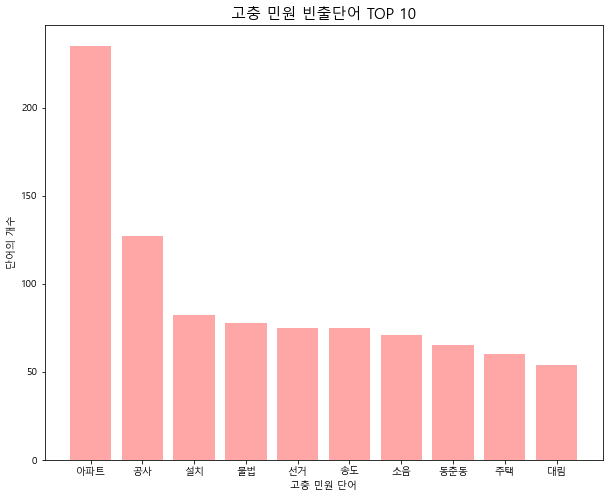

- Í≥†Ï∂©ÎØºÏõê_Top10_Bargraph.png Í∞Ä Ï†ÄÏû• ÎêòÏóàÏäµÎãàÎã§.



In [45]:
# ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏÉùÏÑ± Ìï®Ïàò Ïã§Ìñâ
# top Î≥ÄÏàò : top_n(file3) Ìï®Ïàò ÏóêÏÑú globalÎ°ú ÏßÄÏ†ï

topn_bar(top)

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

In [51]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ± Ìï®Ïàò
def Grievance_wordcloud(filename):
    
    print(f'{filename}Ïùò ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±ÌïòÎäî Ï§ë ..')

    # ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º ÏÉùÏÑ±Ìï† ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
    with open(filename, encoding='utf8') as f:
        data = f.read()
        
        # text Ï§ëÏóêÏÑú ',', '/' Îì± Î∂àÌïÑÏöîÌïú Í∏∞Ìò∏ Î∂ÄÎ∂Ñ ÏóÜÏï†Í∏∞
        data = re.sub('[^\s\w]', ' ', data)
        data = re.sub('\s+', ' ', data)

        # text Ï§ëÏóêÏÑú Í¥ÄÎ†®ÏóÜÎäî Îã®Ïñ¥ ÏÇ≠Ï†úÎ•º ÏúÑÌïú stopwords_list ÏÑ§Ï†ï
        stopwords_list = ['Í¥ÄÎ†®', 'ÏöîÏ≤≠', 'Í¥ÄÎ¶¨', 'ÎåÄÌïú', 'ÏÇ¨Ìï≠', 'Ï°∞Ï†ï', 'Ï§ëÏßÄ', 'ÏûëÏóÖ', 'ÏäπÏù∏', 'Ïù¥ÏùòÏ†úÍ∏∞', 'Í∑úÏïΩ', 'Í∑úÏ†ï', 'ÏúÑÎ∞ò'
                         'Î∂àÎ≤ï', 'ÏúÑÎ∞ò','Î∞è','Í≥†Î∞ú Í±¥', 'ÎØºÏõê','ÎåÄÌëú', 'ÌïòÎã§','Îì±', 'Ïù∏ÌïòÎã§', 'ÏûàÎã§', 'Ï£ºÏûê', 'ÌöåÏùò', 'ÏöîÍµ¨', 'Î≤àÏßÄ',
                         'Îã®ÏÜç', 'ÏãúÏÑ§', 'Ï£ºÎ≥Ä']

        # ÏÇ≠Ï†úÌï† Îã®Ïñ¥Î•º replaceÎ•º Ïù¥Ïö©ÌïòÏó¨ '' Î°ú Î≥ÄÍ≤Ω
        for i in range(len(stopwords_list)):
            data = data.replace(stopwords_list[i], '')

        # Î∂àÌïÑÏöîÌïòÍ≤å ÏÉùÏÑ±Îêú Í≥µÎ∞± Ï†úÍ±∞
        data = " ".join(data.split())

        # text ÌååÏùº Ï†ïÏ†úÌïòÍ∏∞
        engine = Okt()
        all_nouns = engine.nouns(data)
        nouns = [n for n in all_nouns if len(n) > 1]
        
        # Í∞úÏàò count
        count = Counter(nouns)

        tags = count.most_common(100)
        
        # ÎûúÎç§ Ìï®Ïàò
        import random as r
        
        # ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ± : ÏÑ∏Î∂ÄÍ∞í ÏÑ§Ï†ï        
        wc = WordCloud(font_path = font_fname, # fontÍ∞Ä ÏûàÎäî ÏúÑÏπò
                       # background_color = (r.randint(0,255),r.randint(0,255), r.randint(0,255)), # ÎûúÎç§ÏúºÎ°ú ÏÉâÏÉÅ ÏÑ§Ï†ï
                       # background_color = ('241, 105, 158'), # ÏûÑÏùòÎ°ú ÏÉâÏÉÅ ÏÑ§Ï†ïÌï¥Î≥¥Í∏∞
                       background_color = ('white'), # ÏÉâÏÉÅÏù¥Î¶ÑÏúºÎ°ú ÏÑ§Ï†ïÌï¥Î≥¥Í∏∞
                       width = 3000, # ÌÅ¨Í∏∞ÏÑ§Ï†ï
                       height = 2000)
        
        cloud = wc.generate_from_frequencies(dict(tags))
        
        # Ïù¥ÎØ∏ÏßÄÎ°ú Î≥¥Ïó¨Ï£ºÍ∏∞
        plt.imshow(cloud, interpolation='bilinear')
        plt.axis('off')
        
        # Ïù¥ÎØ∏ÏßÄÌååÏùºÎ°ú Ï†ÄÏû• : Í≥†Ï∂©ÎØºÏõê_wordscloud.png
        # ÏõêÌïòÎäî ÏúÑÏπòÏóê Ï†ÄÏû•ÌïòÎ†§Î©¥ Í≤ΩÎ°ú ÏÑ§Ï†ï ! : graphs/fig_name.png
        fig_name = f'{filename}_wordclouds.png'
        plt.savefig(fig_name)
        plt.show()
    
    # Ìï®Ïàò Ïã§Ìñâ ÌôïÏù∏
    print(f'- {filename}Ïùò ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÍ∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.')

## Ï†ÑÏ≤¥(2014~2022) ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

Í≥†Ï∂©ÎØºÏõê_text.txtÏùò ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±ÌïòÎäî Ï§ë ..


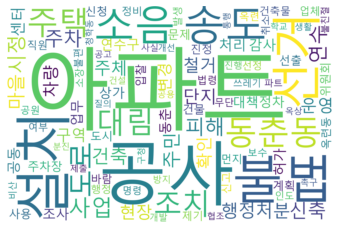

- Í≥†Ï∂©ÎØºÏõê_text.txtÏùò ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÍ∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [52]:
# Ï†ïÏ†úÎêú text ÌååÏùº
# Í≥†Ï∂©ÎØºÏõê ÏôÑÎ£å text : 'Í≥†Ï∂©ÎØºÏõê_text_data.txt'
filename = 'Í≥†Ï∂©ÎØºÏõê_text.txt'

# Ìï®Ïàò Ïã§Ìñâ
Grievance_wordcloud(filename)

## 2021 ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

In [53]:
# ÎÖÑÎèÑÎßå Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌïú Ìòï Î≥ÄÌôò
Grievance2['apply_date'] = Grievance2['apply_date'].astype('str')

# ÎÖÑÎèÑ Ï∂îÏ∂ú
temp = []
for i in range(len(Grievance2)):
    temp.append(Grievance2.loc[i]['apply_date'][:4])
    
Grievance2['apply_date'] = temp

# ÎÖÑÎèÑÎ≥Ñ df ÏÉùÏÑ±ÏùÑ ÏúÑÌï¥ ÎÖÑÎèÑÎ≥ÑÎ°ú Î¶¨Ïä§Ìä∏Ïóê Í∞í ÎÑ£Ïñ¥Ï£ºÍ∏∞
list_21 = []

for i in range(len(Grievance2)):

    if Grievance2.loc[i]['apply_date'] == '2021':
        list_21.append(Grievance2.loc[i])
        

# ÎÖÑÎèÑÎ≥Ñ ÎîïÏÖîÎÑàÎ¶¨ ÌòïÏÑ±
Grievance_year = {'2021' : list_21}

In [54]:
# 2021ÎÖÑ Í≥†Ï∂©ÎØºÏõê

Grievance_2021 = pd.DataFrame(Grievance_year['2021'])
Grievance_2021.reset_index(inplace = True)
Grievance_2021.drop(['apply_date','index','gid'], axis = 1, inplace = True)
Grievance_text_2021 = ' '.join(Grievance_2021['compl_contents'])

# ÎØºÏõê Îç∞Ïù¥ÌÑ∞ ÌÖçÏä§Ìä∏ ÌååÏùºÎ°ú Ï†ÄÏû• : 'Í≥†Ï∂©ÎØºÏõê_text_2021.txt'
with open('Í≥†Ï∂©ÎØºÏõê_text_2021.txt', 'w', encoding='utf8') as f:
    f.write(Grievance_text_2021)

# ÎØºÏõê ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ : 'Í≥†Ï∂©ÎØºÏõê_text_2021.txt
f = open('Í≥†Ï∂©ÎØºÏõê_text_2021.txt', 'r', encoding='utf8')
Grievance_text_2021 = f.read()

Grievance_text_2021

'ÌïúÎÇòÎ£®Î°ú158Î≤àÍ∏∏31 Í±¥Î¨ºÎ∂ïÍ¥¥ÏúÑÌóòÍ¥ÄÎ†® Ïû¨ÎÇúÏúÑÌóòÏßÄÏó≠ ÏßÄÏ†ï ÏöîÏ≤≠ Ïö∞ÏÑ±2Ï∞®ÏïÑÌååÌä∏ 202ÎèôÎåÄÌëú ÏÑ†Í¥ÄÏúÑ Í¥ÄÎ†® ÎØºÏõê Í∞ÄÏä§Í≥ÑÎüâÍ∏∞ ÍµêÏ≤¥ Ï¥âÍµ¨ ÏïÑÌååÌä∏ÏÑ†Í±∞Í¥ÄÎ¶¨ÏúÑÏõêÌöå ÏÑúÎ©¥ÎèôÏùò Ï†ëÏàò Í¥ÄÎ†® ÎèôÏ∂òÎèô Í±¥Ï∂ïÎ¨ºÍ¥ÄÎ†® ÏãúÏ†ïÏ¥âÍµ¨Ïóê ÎåÄÌïú ÌñâÏ†ïÏ°∞Ïπò Ïû¨Í±¥Ï∂ïÏÇ¨ÏóÖÏùÑ ÏúÑÌïú ÏßÑÏ†ïÏÑú Ï†úÏ∂ú Ïò•Î†®ÏãúÏû• Í¥ÄÎ†® Ïò•Î†®ÏãúÏû• Í¥ÄÎ†® Î∂ÄÎèôÏÇ∞ Ï§ëÍ∞úÏóÖÏÜå Îã®ÏÜç ÏÇ¨Í∂åÏ†úÌïúÌÜ†ÏßÄ ÏùºÎ∞òÍ≥ºÏÑ∏ Ï†ÑÌôòÏóê Í¥ÄÌïú Í±¥ Ïû¨Í∞úÎ∞ú Ïù¥Ï£º ÌòëÏùò Í¥ÄÎ†®Í±¥ Ï£ºÏ†ïÏ∞® Í∏àÏßÄÍµ¨Ïó≠ ÏßÄÏ†ï ÏöîÏ≤≠ ÎèôÏ∂òÎèô843-2 Í±¥Ï∂ïÎ¨ºÍ¥ÄÎ†® ÌñâÏ†ïÏ°∞Ïπò ÏÜ°ÎèÑÏó≠ Í±¥ÏÑ§ÌòÑÏû• ÏÇ¨ÏßÑ ÏûêÎ£å Ï†úÏ∂ú Î≤ΩÏÇ∞ÎπåÎ¶¨ÏßÄ Ïû¨Í±¥Ï∂ï ÏÇ¨ÏóÖÏóê Í¥ÄÌïú ÎØºÏõê Î≤ΩÏÇ∞ÎπåÎ¶¨ÏßÄ Ïû¨Í±¥Ï∂ï ÏÇ¨ÏóÖÏóê Í¥ÄÌïú ÎØºÏõê Î≤ΩÏÇ∞ÎπåÎ¶¨ÏßÄ Ïû¨Í±¥Ï∂ï ÏÇ¨ÏóÖÏóê Í¥ÄÌïú ÎØºÏõê ÍµêÌÜµÎ∂àÌé∏ Ìï¥Í≤∞ ÏöîÏ≤≠ Ïò•Î†®ÏãúÏû• ÏïÑÏºÄÏù¥Îìú ÏÑ§ÏπòÎ°ú Ïù∏Ìïú ÌîºÌï¥ Í∞ïÏ†úÏù¥Ìñâ Î∂ÄÍ≥ºÍ∏àÏóê ÎåÄÌïú Ïù¥ÏùòÏ†úÍ∏∞ÏÑú Ïò•Î†®ÏãúÏû• Î∂àÎ≤ïÎÖ∏Ï†ê Î∞è ÏÉÅÍ∞Ä ÏÜåÎ∞©ÎèÑÎ°ú Î∂àÎ≤ïÏ†êÏö© Îì±Ïùò ÏúÑÎ≤ïÌñâÏúÑÏóê Í¥ÄÌïú Í±¥ Í≥µÎèôÏ£ºÌÉù

Í≥†Ï∂©ÎØºÏõê_text_2021.txtÏùò ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±ÌïòÎäî Ï§ë ..


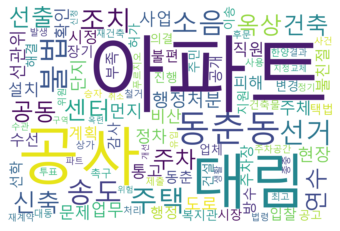

- Í≥†Ï∂©ÎØºÏõê_text_2021.txtÏùò ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÍ∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [55]:
# Í≥†Ï∂©ÎØºÏõê 2021ÎÖÑ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
filename = 'Í≥†Ï∂©ÎØºÏõê_text_2021.txt'

# Ìï®Ïàò Ïã§Ìñâ
Grievance_wordcloud(filename)